https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3351073/
<br>http://docs.cntd.ru/document/1200088764
<br>http://www1.fips.ru/fips_servl/fips_servlet?DB=RUPM&DocNumber=171691&TypeFile=html
<br>http://astro.miem.hse.ru/publications?search=15a2d174e97e87863dd28c8cfacb3ee1
<br> https://stackoverflow.com/questions/29127013/plot-dendrogram-using-sklearn-agglomerativeclustering

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
import os 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Loading data functions

In [3]:
def load_data(in_file):
    input_f = open(in_file, "r")
    matrix = []
    for line in input_f:
        channels = [] #get channels
        for l in line.split("|"):
            samples = l.split(";")
            channels.append([float(i) for i in samples])
        matrix.append(channels)
        del channels
    input_f.close()
    return matrix

In [4]:
def load_labels(in_file):
    input_f = open(in_file, "r")
    labels = []
    for line in input_f:
        if ";" in line:
            labels.append(set(line.replace("\n","").split(";")))
        else:
            labels.append(line.replace("\n",""))
    input_f.close()
    return labels

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

def load_dataset():
    X_train_data = load_data("data/data_train.txt")
    y_train_lat_labels = load_labels("data/labels_train.txt")
    print ("initial data: ", np.array(X_train_data).shape)

    X_test_data = load_data("data/data_test.txt")
    y_test_lat_labels = load_labels("data/labels_test.txt")
    y_test_lat_labels = ["_with_".join(i) for i in y_test_lat_labels]
    print ("initial data: ", np.array(X_test_data).shape)
    
    ##########################################
    X_train_big = []
    X_train_big.extend(X_train_data)
    X_train_big.extend(X_test_data)
    X_train_big = np.array(X_train_big)

    y_train_lat_big = []
    y_train_lat_big.extend(y_train_lat_labels)
    y_train_lat_big.extend(y_test_lat_labels)
    
    y_train_lat_big_list = []
    for i in y_train_lat_big:
        if type(i) is list:
            y_train_lat_big_list.append(i)
        else:
            y_train_lat_big_list.append([i])

    mlb = MultiLabelBinarizer()
    y_train_big =  mlb.fit_transform(y_train_lat_big_list) 

    X_new_data = load_data("data/data_new.txt")
    print ("initial data: ", np.array(X_new_data).shape)
    return X_train_big, y_train_big, X_new_data, mlb

# Working block

In [6]:
X_train, y_train_bin, X_new, mlb = load_dataset()

y_train2 = load_labels("data/labels_all.txt")
y_train = []
for item in y_train2:
    y_train.append([item])
y_train = mlb.fit_transform(y_train)

initial data:  (36, 8, 121)
initial data:  (4, 8, 121)
initial data:  (75, 8, 121)


In [7]:
X_train = X_train
X_train = np.array(X_train)
n_samples = len(X_train)
X_train = X_train.reshape((n_samples, -1))

X_new = X_new
X_new = np.array(X_new)
n_samples = len(X_new)
X_new = X_new.reshape((n_samples, -1))

In [8]:
y_new_true_labels = load_labels("data/new/true_labels.txt")
y_new_true_labels = [list(filter(None, lab)) for lab in y_new_true_labels]
y_new_true_labels.append(['benzin'])
y_new_true_labels =  mlb.fit_transform(y_new_true_labels) 
y_new_true_labels = list(y_new_true_labels)[:-1]
y_new_true_labels = np.array(y_new_true_labels)

## CWT + Mexican Hat

## 1

In [9]:
from scipy import signal
widths = np.arange(0.5, 256)
cwtmatr = signal.cwt(X_train[0], signal.ricker, widths)

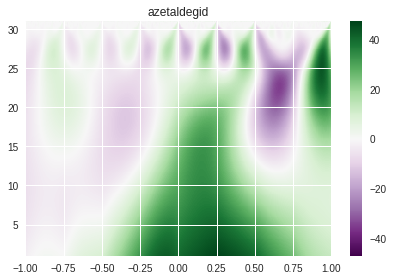

In [10]:
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.title(y_train2[0])
plt.tight_layout()
plt.colorbar()
plt.show()

In [11]:
from sklearn.preprocessing import scale, minmax_scale
#cwtmatr2 = scale( cwtmatr, axis=1, with_mean=True, with_std=True, copy=True )
cwtmatr2 = minmax_scale( cwtmatr,  feature_range=(-1, 1), axis=1, copy=True )

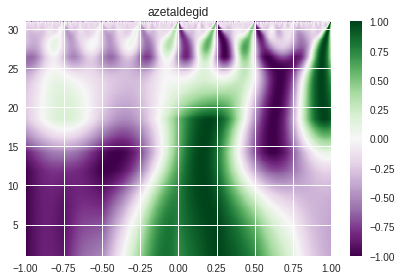

In [12]:
plt.imshow(cwtmatr2, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
            vmax=abs(cwtmatr2).max(), vmin=-abs(cwtmatr2).max())
plt.title(y_train2[0])
plt.tight_layout()
plt.colorbar()
plt.show()

## 2

https://www.researchgate.net/post/What_are_the_preprocessing_steps_required_before_performing_the_wavelet_transform_on_the_signal_and_why_is_this_so
https://www.mathworks.com/help/wavelet/examples/continuous-and-discrete-wavelet-analysis.html
http://ac.els-cdn.com/S000326700300309X/1-s2.0-S000326700300309X-main.pdf?_tid=ce0bcd98-8344-11e7-836b-00000aab0f01&acdnat=1502971899_eeb892be869052cd2ca5b2e25bb9a223

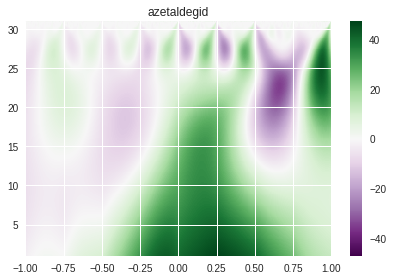

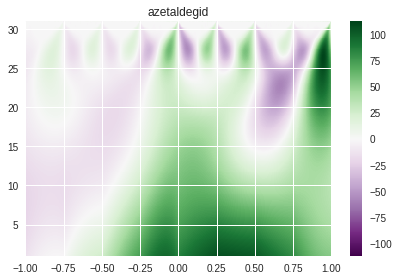

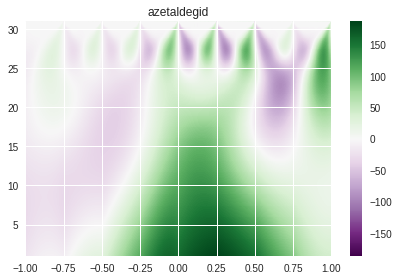

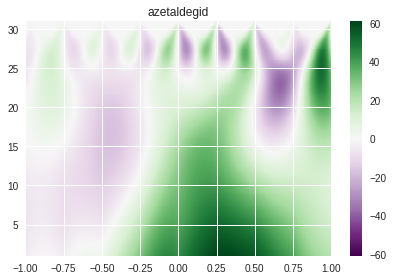

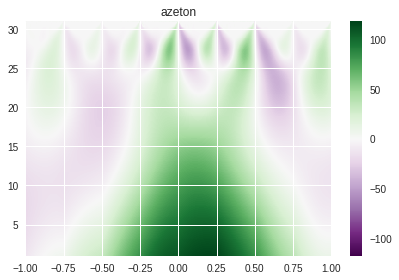

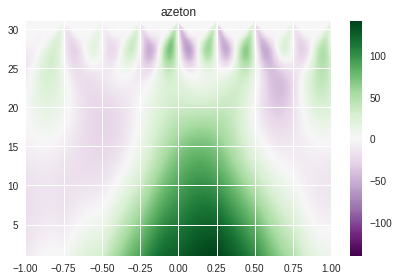

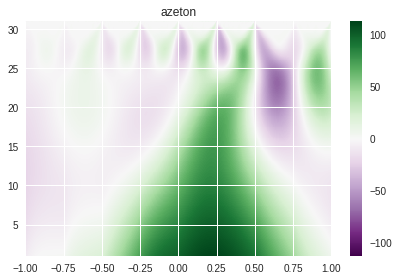

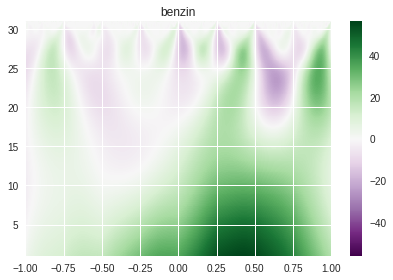

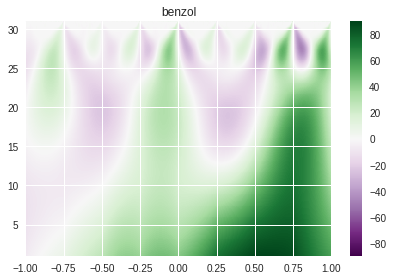

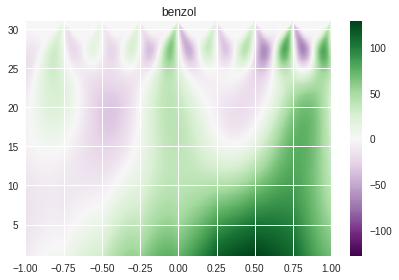

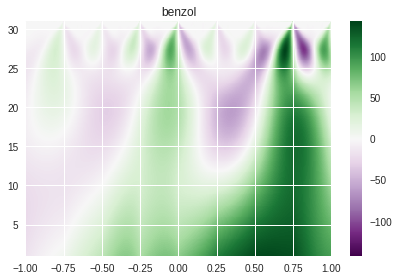

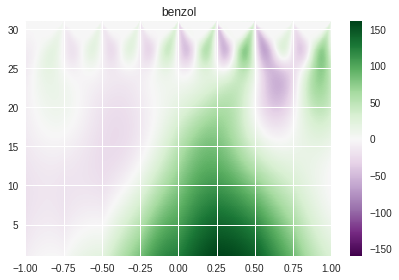

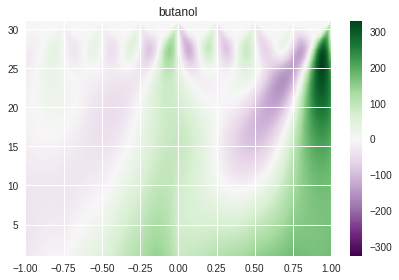

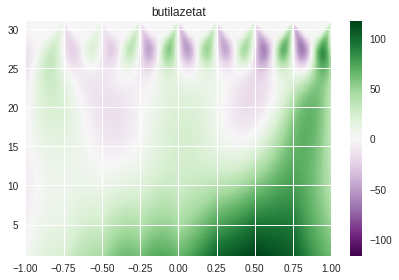

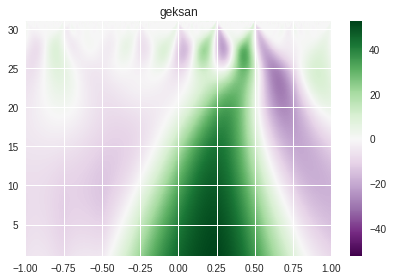

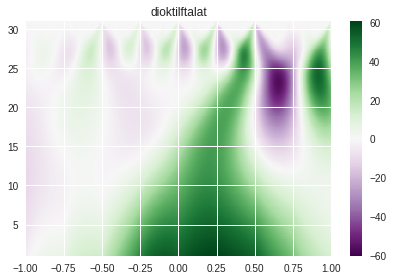

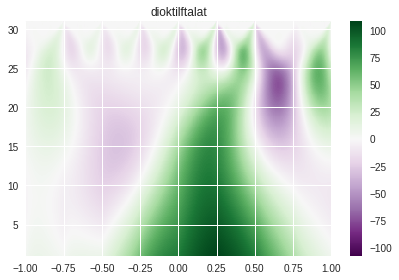

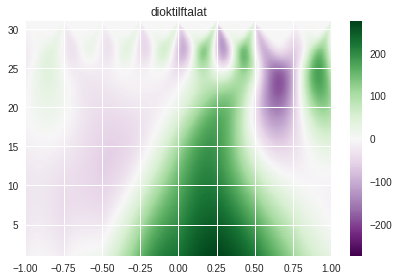

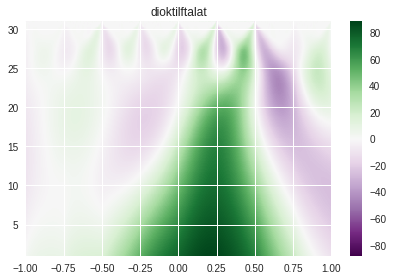

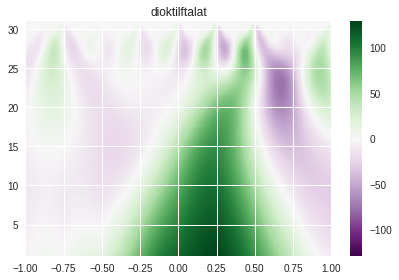

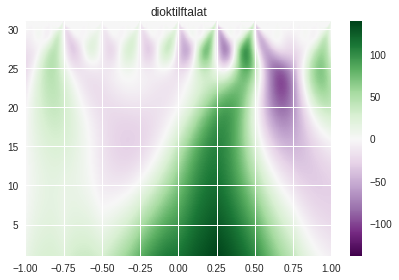

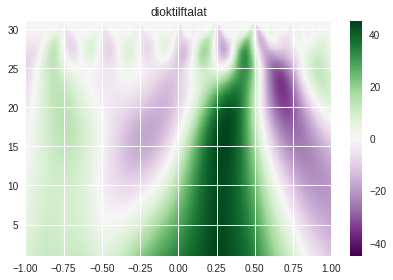

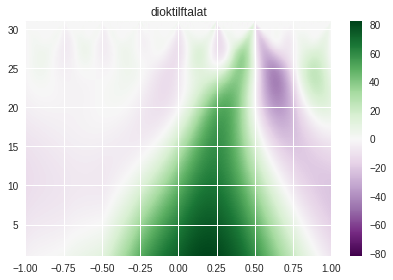

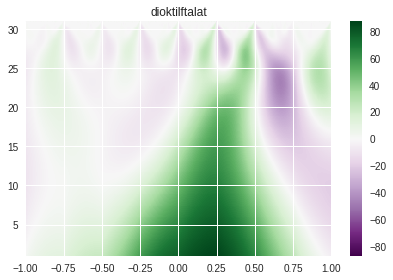

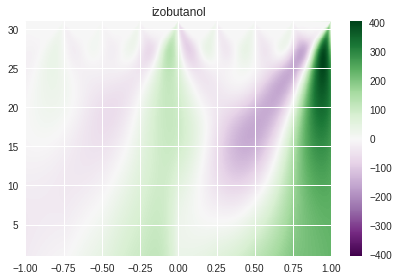

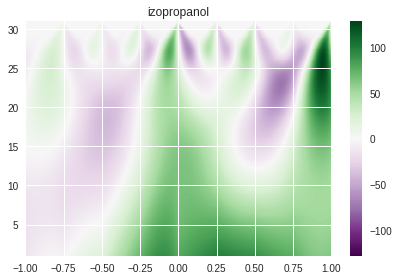

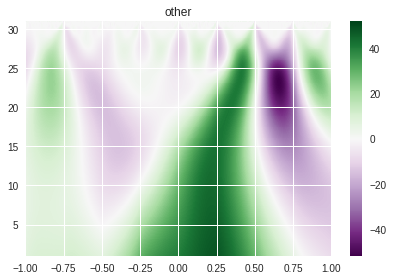

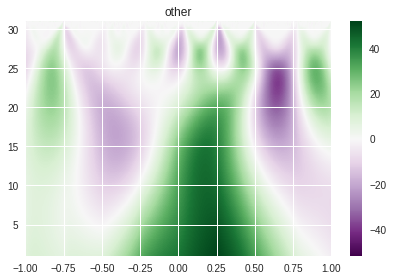

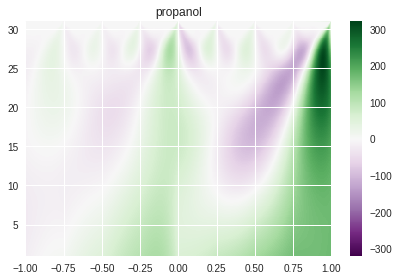

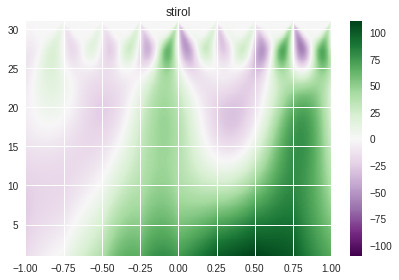

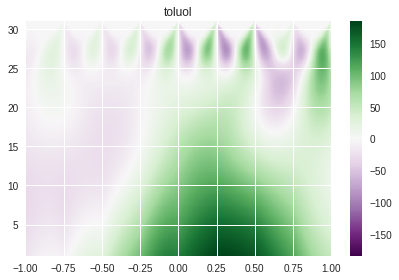

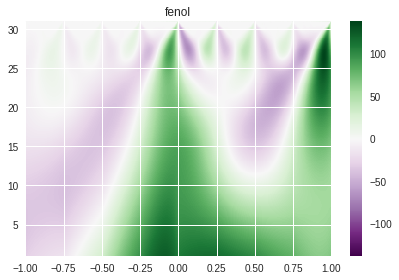

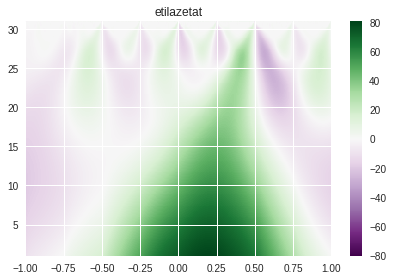

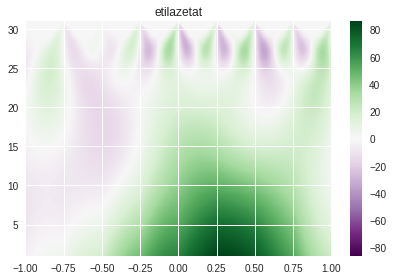

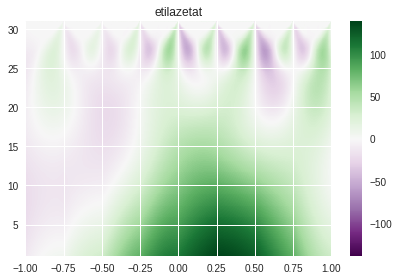

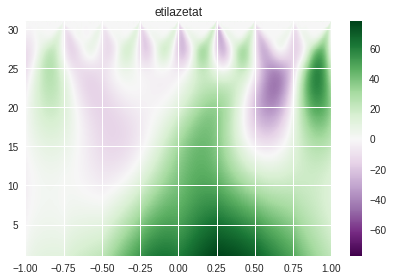

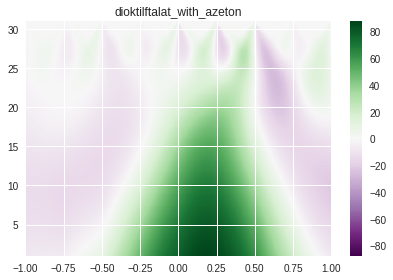

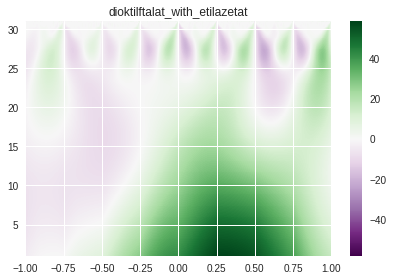

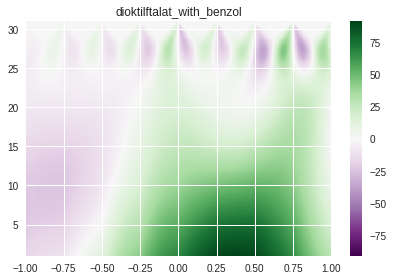

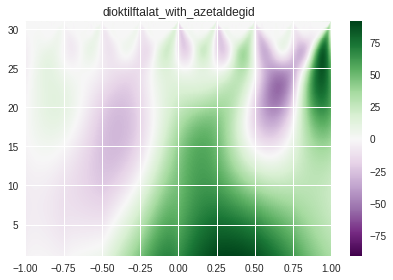

In [13]:
from scipy import signal
from scipy.signal import cwt
widths = np.arange(0.5, 256) #256

cwt_res_raw = []

for sig, y in zip(X_train, y_train2):
    cwtmatr = signal.cwt(sig, signal.ricker, widths)
    cwt_res_raw.append(cwtmatr)

    plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
                vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    plt.title(y)
    plt.tight_layout()
    plt.colorbar()
    plt.show()

In [14]:
cwt_res_test = []
for sig in X_new:
    cwtmatr = signal.cwt(sig, signal.ricker, widths)
    cwtmatr = minmax_scale( cwtmatr,  feature_range=(-1, 1), axis=1, copy=True )
    cwt_res_test.append(cwtmatr)

In [15]:
cwt_res_raw = np.array(cwt_res_raw)
n_samples = len(cwt_res_raw)
cwt_res_raw = cwt_res_raw.reshape((n_samples, -1))

cwt_res_test = np.array(cwt_res_test)
n_samples = len(cwt_res_test)
cwt_res_test = cwt_res_test.reshape((n_samples, -1))

## 3

In [16]:
from scipy import signal
from scipy.signal import cwt
from sklearn.preprocessing import scale, minmax_scale

widths = np.arange(0.5, 256) #256

cwt_res_raw_minmax = []

for sig, y in zip(X_train, y_train2):
    cwtmatr = signal.cwt(sig, signal.ricker, widths)
    cwtmatr = minmax_scale( cwtmatr,  feature_range=(-1, 1), axis=1, copy=True )
    cwt_res_raw_minmax.append(cwtmatr)

    #plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
    #            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    #plt.title(y)
    #plt.tight_layout()
    #plt.colorbar()
    #plt.show()

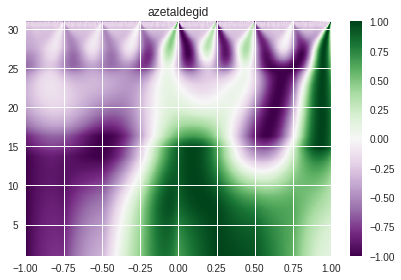

In [17]:
plt.imshow(cwt_res_raw_minmax[1], extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
            vmax=abs(cwt_res_raw_minmax[1]).max(), vmin=-abs(cwt_res_raw_minmax[1]).max())
plt.title(y_train2[0])
plt.tight_layout()
plt.colorbar()
plt.show()

In [18]:
cwt_res_test_minmax = []
for sig in X_new:
    cwtmatr = signal.cwt(sig, signal.ricker, widths)
    cwtmatr = minmax_scale( cwtmatr,  feature_range=(-1, 1), axis=1, copy=True )
    cwt_res_test_minmax.append(cwtmatr)

In [19]:
np.array(cwt_res_test_minmax).shape

(75, 256, 968)

In [20]:
cwt_res_raw_minmax_binarized = []
for item in cwt_res_raw_minmax:
    block = []
    for ii in item:
        row = []
        for i in ii:
            if i >= 0:
                row.append(1)
            else:
                row.append(0)
        block.append(row)
    cwt_res_raw_minmax_binarized.append(block)

In [21]:
cwt_res_raw_minmax_binarized = np.array(cwt_res_raw_minmax_binarized)
cwt_res_raw_minmax_binarized.shape

(40, 256, 968)

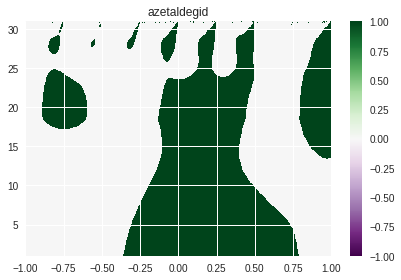

In [22]:
plt.imshow(cwt_res_raw_minmax_binarized[0], extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
            vmax=abs(cwt_res_raw_minmax_binarized[0]).max(), vmin=-abs(cwt_res_raw_minmax_binarized[0]).max())
plt.title(y_train2[0])
plt.tight_layout()
plt.colorbar()
plt.show()

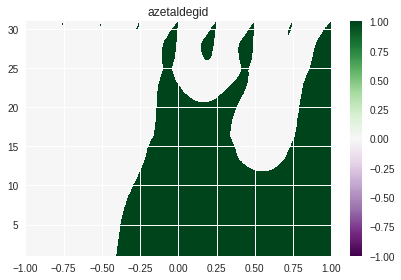

In [23]:
plt.imshow(cwt_res_raw_minmax_binarized[1], extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
            vmax=abs(cwt_res_raw_minmax_binarized[1]).max(), vmin=-abs(cwt_res_raw_minmax_binarized[1]).max())
plt.title(y_train2[2])
plt.tight_layout()
plt.colorbar()
plt.show()

## Distance metrics

In [24]:
def euclidean_distance(image1, image2):
    return np.sum((image1-image2)**2)

In [25]:
def all_distances(cwt, y_train2):
    distances = []
    for base,y_base,i in zip(cwt,y_train2,range(1,len(y_train2)+1)):
        for item,y,j in zip(cwt,y_train2,range(1,len(y_train2)+1)):
            d = euclidean_distance(base, item)
            bases = set([l[0] for l in distances])
            ys = set([l[1] for l in distances])
            if (y_base+str(i), y+str(j), int(d)) not in distances and ( y+str(j), y_base+str(i), int(d)) not in distances:
                distances.append((y_base+str(i), y+str(j), int(d)))
    return distances

In [26]:
import operator
def k_neighbors(distances, x, k):
    distances.sort(key=operator.itemgetter(2))
    neighbors = []
    for item in distances:
        if x in item[0] and len(neighbors) < k:
            if item[2] != 0:
                neighbors.append(item)
    return neighbors

In [27]:
distances0 = all_distances(cwt_res_raw, y_train2)

In [28]:
for k in distances0:
    print (k)

('azetaldegid1', 'azetaldegid1', 0)
('azetaldegid1', 'azetaldegid2', 141767882)
('azetaldegid1', 'azetaldegid3', 541187959)
('azetaldegid1', 'azetaldegid4', 9605819)
('azetaldegid1', 'azeton5', 139012943)
('azetaldegid1', 'azeton6', 218541359)
('azetaldegid1', 'azeton7', 131253008)
('azetaldegid1', 'benzin8', 22759520)
('azetaldegid1', 'benzol9', 173135237)
('azetaldegid1', 'benzol10', 271210941)
('azetaldegid1', 'benzol11', 566569022)
('azetaldegid1', 'benzol12', 306149470)
('azetaldegid1', 'butanol13', 1235794995)
('azetaldegid1', 'butilazetat14', 210377881)
('azetaldegid1', 'geksan15', 28508134)
('azetaldegid1', 'dioktilftalat16', 13061875)
('azetaldegid1', 'dioktilftalat17', 116625479)
('azetaldegid1', 'dioktilftalat18', 1523746809)
('azetaldegid1', 'dioktilftalat19', 74954067)
('azetaldegid1', 'dioktilftalat20', 208941578)
('azetaldegid1', 'dioktilftalat21', 294100672)
('azetaldegid1', 'dioktilftalat22', 41557288)
('azetaldegid1', 'dioktilftalat23', 55393488)
('azetaldegid1', 'dio

In [29]:
kn = k_neighbors(distances0, 'azetaldegid1', 10)
kn.sort(key=operator.itemgetter(2))
for KN in kn:
    print (KN)

('azetaldegid1', 'azetaldegid4', 9605819)
('azetaldegid1', 'dioktilftalat16', 13061875)
('azetaldegid1', 'dioktilftalat_with_etilazetat38', 16612666)
('azetaldegid1', 'other28', 18165881)
('azetaldegid1', 'benzin8', 22759520)
('azetaldegid1', 'geksan15', 28508134)
('azetaldegid1', 'etilazetat36', 30330340)
('azetaldegid1', 'other27', 31150852)
('azetaldegid1', 'dioktilftalat22', 41557288)
('azetaldegid1', 'etilazetat33', 45468585)


In [30]:
distances = all_distances(cwt_res_raw_minmax, y_train2)

In [31]:
for k in distances:
    print (k)

('azetaldegid1', 'azetaldegid1', 0)
('azetaldegid1', 'azetaldegid2', 25514)
('azetaldegid1', 'azetaldegid3', 5320)
('azetaldegid1', 'azetaldegid4', 9695)
('azetaldegid1', 'azeton5', 26966)
('azetaldegid1', 'azeton6', 20265)
('azetaldegid1', 'azeton7', 16699)
('azetaldegid1', 'benzin8', 46105)
('azetaldegid1', 'benzol9', 119682)
('azetaldegid1', 'benzol10', 81464)
('azetaldegid1', 'benzol11', 122090)
('azetaldegid1', 'benzol12', 14222)
('azetaldegid1', 'butanol13', 72624)
('azetaldegid1', 'butilazetat14', 83337)
('azetaldegid1', 'geksan15', 28704)
('azetaldegid1', 'dioktilftalat16', 9528)
('azetaldegid1', 'dioktilftalat17', 18070)
('azetaldegid1', 'dioktilftalat18', 11914)
('azetaldegid1', 'dioktilftalat19', 29495)
('azetaldegid1', 'dioktilftalat20', 22477)
('azetaldegid1', 'dioktilftalat21', 27405)
('azetaldegid1', 'dioktilftalat22', 49022)
('azetaldegid1', 'dioktilftalat23', 28354)
('azetaldegid1', 'dioktilftalat24', 25579)
('azetaldegid1', 'izobutanol25', 114948)
('azetaldegid1', 'iz

In [32]:
kn = k_neighbors(distances, 'azetaldegid1', 10)
kn.sort(key=operator.itemgetter(2))
for KN in kn:
    print (KN)

('azetaldegid1', 'azetaldegid3', 5320)
('azetaldegid1', 'etilazetat36', 8960)
('azetaldegid1', 'dioktilftalat16', 9528)
('azetaldegid1', 'azetaldegid4', 9695)
('azetaldegid1', 'dioktilftalat18', 11914)
('azetaldegid1', 'dioktilftalat_with_azetaldegid40', 12963)
('azetaldegid1', 'benzol12', 14222)
('azetaldegid1', 'azeton7', 16699)
('azetaldegid1', 'dioktilftalat17', 18070)
('azetaldegid1', 'toluol31', 18164)


# Matrix to binary

In [33]:
cwt_res_test_minmax_binarized = []
for item in cwt_res_raw_minmax:
    block = []
    for ii in item:
        row = []
        for i in ii:
            if i >= 0:
                row.append(1)
            else:
                row.append(0)
        block.append(row)
    cwt_res_test_minmax_binarized.append(block)

In [34]:
cwt_res_test_minmax_binarized = np.array(cwt_res_test_minmax_binarized)
cwt_res_test_minmax_binarized.shape

(40, 256, 968)

In [35]:
cwt_res_raw_minmax_binarized = np.array(cwt_res_raw_minmax_binarized)
n_samples = len(cwt_res_raw_minmax_binarized)
cwt_res_raw_minmax_binarized = cwt_res_raw_minmax_binarized.reshape((n_samples, -1))

cwt_res_test_minmax_binarized = np.array(cwt_res_test_minmax_binarized)
n_samples = len(cwt_res_test_minmax_binarized)
cwt_res_test_minmax_binarized = cwt_res_test_minmax_binarized.reshape((n_samples, -1))

In [36]:
distances2 = all_distances(cwt_res_raw_minmax_binarized, y_train2)

In [37]:
for k in distances2:
    print (k)

('azetaldegid1', 'azetaldegid1', 0)
('azetaldegid1', 'azetaldegid2', 44903)
('azetaldegid1', 'azetaldegid3', 18621)
('azetaldegid1', 'azetaldegid4', 27937)
('azetaldegid1', 'azeton5', 43548)
('azetaldegid1', 'azeton6', 32737)
('azetaldegid1', 'azeton7', 43474)
('azetaldegid1', 'benzin8', 58425)
('azetaldegid1', 'benzol9', 98963)
('azetaldegid1', 'benzol10', 69264)
('azetaldegid1', 'benzol11', 92528)
('azetaldegid1', 'benzol12', 34975)
('azetaldegid1', 'butanol13', 67192)
('azetaldegid1', 'butilazetat14', 80736)
('azetaldegid1', 'geksan15', 43254)
('azetaldegid1', 'dioktilftalat16', 29815)
('azetaldegid1', 'dioktilftalat17', 41403)
('azetaldegid1', 'dioktilftalat18', 37242)
('azetaldegid1', 'dioktilftalat19', 48153)
('azetaldegid1', 'dioktilftalat20', 43501)
('azetaldegid1', 'dioktilftalat21', 42439)
('azetaldegid1', 'dioktilftalat22', 49045)
('azetaldegid1', 'dioktilftalat23', 54452)
('azetaldegid1', 'dioktilftalat24', 44752)
('azetaldegid1', 'izobutanol25', 88329)
('azetaldegid1', 'iz

In [38]:
kn = k_neighbors(distances2, 'azetaldegid1', 10)
kn.sort(key=operator.itemgetter(2))
for KN in kn:
    print (KN)

('azetaldegid1', 'azetaldegid3', 18621)
('azetaldegid1', 'azetaldegid4', 27937)
('azetaldegid1', 'dioktilftalat16', 29815)
('azetaldegid1', 'azeton6', 32737)
('azetaldegid1', 'dioktilftalat_with_azetaldegid40', 33355)
('azetaldegid1', 'etilazetat36', 34849)
('azetaldegid1', 'benzol12', 34975)
('azetaldegid1', 'toluol31', 35437)
('azetaldegid1', 'dioktilftalat18', 37242)
('azetaldegid1', 'dioktilftalat17', 41403)


#PCA

In [44]:
#cwt_res_raw
#cwt_res_raw_minmax
#cwt_res_raw_minmax_binarized

In [45]:
from sklearn.preprocessing import scale
cwt_res_raw_scaled = scale(cwt_res_raw)

In [46]:
from sklearn.decomposition import PCA
pca_raw = PCA()
cwt_res_raw_scaled_pca = pca_raw.fit_transform(cwt_res_raw_scaled ,y_train)

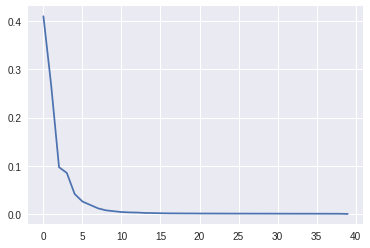

In [47]:
plt.plot(range(len(cwt_res_raw)), pca_raw.explained_variance_ratio_)

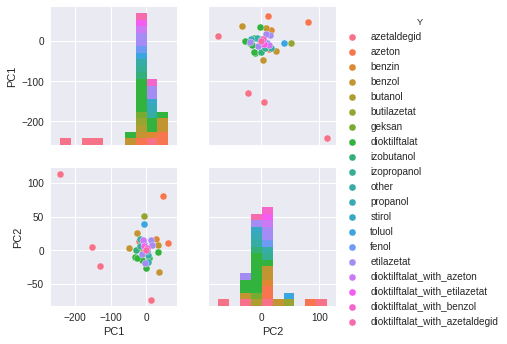

In [48]:
df = pd.DataFrame(list(map(list, zip(*cwt_res_raw_scaled_pca[:2]))), index=None, columns=["PC1", "PC2"])
df["Y"] = y_train2
import seaborn as sns
sns.set()
sns.pairplot(df, hue="Y")

In [49]:
from sklearn.decomposition import PCA
pca_raw = PCA()
cwt_res_raw_pca = pca_raw.fit_transform(cwt_res_raw,y_train)

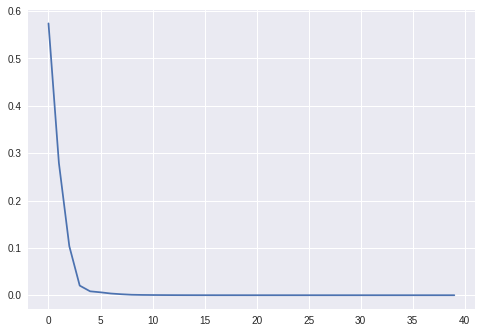

In [50]:
plt.plot(range(len(cwt_res_raw)), pca_raw.explained_variance_ratio_)

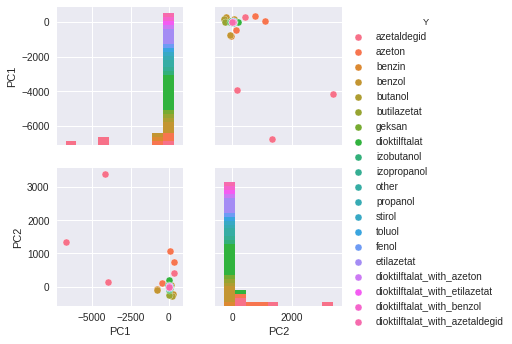

In [51]:
df = pd.DataFrame(list(map(list, zip(*cwt_res_raw_pca[:2]))), index=None, columns=["PC1", "PC2"])
df["Y"] = y_train2
import seaborn as sns
sns.set()
sns.pairplot(df, hue="Y")

In [52]:
cwt_res_raw_minmax = np.array(cwt_res_raw_minmax)
n_samples = len(cwt_res_raw_minmax)
cwt_res_raw_minmax = cwt_res_raw_minmax.reshape((n_samples, -1))

In [53]:
from sklearn.decomposition import PCA
pca_raw_minmax = PCA()
cwt_res_raw_minmax_scaled = scale(cwt_res_raw_minmax)
cwt_res_raw_minmax_pca = pca_raw_minmax.fit_transform(cwt_res_raw_minmax_scaled,y_train)

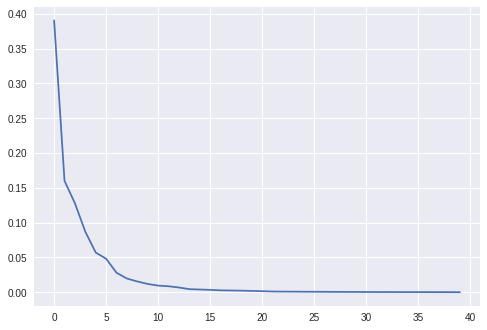

In [54]:
plt.plot(range(len(cwt_res_raw_minmax)), pca_raw_minmax.explained_variance_ratio_)

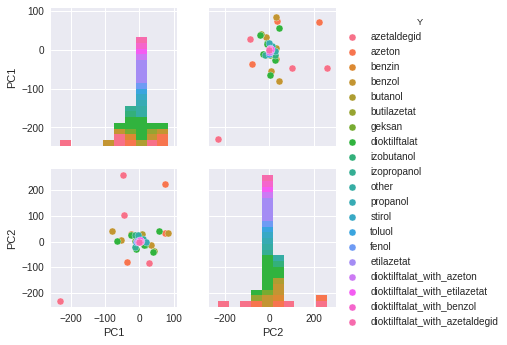

In [55]:
df = pd.DataFrame(list(map(list, zip(*cwt_res_raw_minmax_pca[:2]))), index=None, columns=["PC1", "PC2"])
df["Y"] = y_train2
import seaborn as sns
sns.set()
sns.pairplot(df, hue="Y")

In [56]:
from sklearn.decomposition import PCA
pca_raw_minmax_binarized = PCA()
cwt_res_raw_minmax_binarized_pca = pca_raw_minmax_binarized.fit_transform(cwt_res_raw_minmax_binarized,y_train)

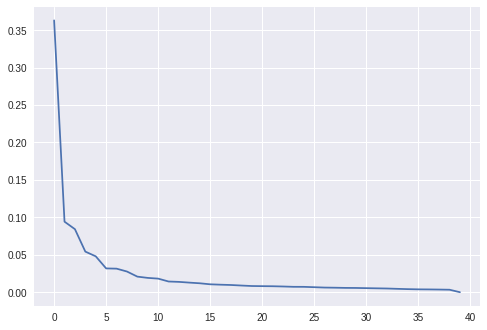

In [57]:
plt.plot(range(len(cwt_res_raw_minmax_binarized)), pca_raw_minmax_binarized.explained_variance_ratio_)

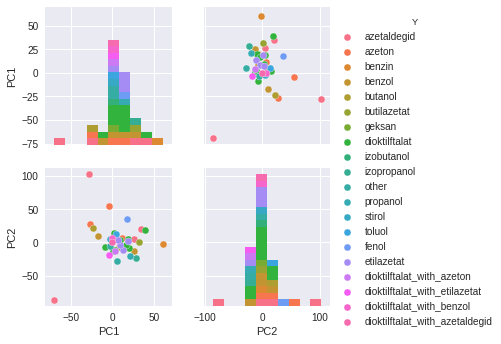

In [58]:
df = pd.DataFrame(list(map(list, zip(*cwt_res_raw_minmax_binarized_pca[:2]))), index=None, columns=["PC1", "PC2"])
df["Y"] = y_train2
import seaborn as sns
sns.set()
sns.pairplot(df, hue="Y")

# Cross Validation

In [59]:
from sklearn.cross_validation import KFold, cross_val_score
#kfold = KFold(n=len(cwt_res_raw), n_folds=5, random_state=7)
kfold = KFold(n=len(cwt_res_raw_minmax), n_folds=5, random_state=7)

/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import  GradientBoostingClassifier

from sklearn.multiclass import OneVsRestClassifier

processors=1
#scoring='neg_log_loss' #for the newest Anaconda
scoring='log_loss' #for Anaconda 3.4

models = []
models.append(('LogRegr', OneVsRestClassifier(LogisticRegression())))
models.append(('DecTree', OneVsRestClassifier(DecisionTreeClassifier())))
models.append(('RFC', OneVsRestClassifier(RandomForestClassifier())))
models.append(('SVM', OneVsRestClassifier(SVC(probability=True))))
models.append(('ExtraTrees', OneVsRestClassifier(ExtraTreesClassifier())))
models.append(('AdaBoost', OneVsRestClassifier(AdaBoostClassifier())))
models.append(('Bagging', OneVsRestClassifier(BaggingClassifier())))
models.append(('GBT', OneVsRestClassifier(GradientBoostingClassifier())))

results = []

for name, model in models:
    print (name+" learning...")
    #cv_results = cross_val_score(model, cwt_res_raw, y_train, cv=kfold, scoring=scoring, n_jobs=processors)
    cv_results = cross_val_score(model, cwt_res_raw_minmax, y_train, cv=kfold, scoring=scoring, n_jobs=processors)

    results.append( (name, cv_results.mean(), cv_results.std()) )

LogRegr learning...


/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packag

DecTree learning...


/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 13 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packa

RFC learning...


/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 13 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packa

SVM learning...


/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 13 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packa

ExtraTrees learning...


/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packag

AdaBoost learning...


/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 13 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packa

Bagging learning...


/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packag

GBT learning...


/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/home/alina/Programms/anaconda3-4.4.0/lib/python3.6/site-packag

In [61]:
from operator import itemgetter
for item in sorted(results,key=itemgetter(1), reverse=True):
    print("{0}: ({1:.3f}) +/- ({2:.3f})".format(item[0], item[1], item[2]))

GBT: (-26.373) +/- (10.298)
SVM: (-27.660) +/- (12.212)
RFC: (-28.246) +/- (10.998)
AdaBoost: (-28.606) +/- (5.576)
LogRegr: (-28.851) +/- (9.293)
DecTree: (-29.274) +/- (5.939)
Bagging: (-30.538) +/- (6.263)
ExtraTrees: (-32.966) +/- (1.984)


## widths = np.arange(0.5, 256) + minmax + binarization 



## widths = np.arange(0.5, 256)

* DecTree: (-23.782) +/- (7.003)
* GBT: (-26.534) +/- (9.858)
* AdaBoost: (-27.372) +/- (3.251)
* Bagging: (-27.380) +/- (12.444)
* SVM: (-27.506) +/- (12.215)
* ExtraTrees: (-28.844) +/- (11.019)
* LogRegr: (-29.516) +/- (6.056)
* RFC: (-32.138) +/- (4.437)


## widths = np.arange(1, 256)
* GBT: (-26.871) +/- (9.544)
* DecTree: (-27.023) +/- (5.253)
* AdaBoost: (-27.333) +/- (3.778)
* SVM: (-27.512) +/- (12.225)
* LogRegr: (-29.530) +/- (6.067)
* RFC: (-29.639) +/- (7.515)
* Bagging: (-29.773) +/- (7.620)
* ExtraTrees: (-30.587) +/- (5.886)

## widths = np.arange(0.1, 256)

* DecTree: (-23.844) +/- (6.962)
* GBT: (-26.313) +/- (10.357)
* RFC: (-27.410) +/- (12.315)
* SVM: (-27.500) +/- (12.245)
* AdaBoost: (-27.940) +/- (3.068)
* Bagging: (-28.789) +/- (11.214)
* LogRegr: (-29.543) +/- (6.086)
* ExtraTrees: (-30.736) +/- (4.310)

## widths = np.arange(0.3, 256)
* GBT: (-26.756) +/- (10.042)
* AdaBoost: (-27.017) +/- (4.113)
* RFC: (-27.178) +/- (12.489)
* SVM: (-27.513) +/- (12.218)
* DecTree: (-27.934) +/- (6.020)
* LogRegr: (-29.516) +/- (6.058)
* Bagging: (-30.580) +/- (6.003)
* ExtraTrees: (-30.593) +/- (5.973)

# Dec Trees

In [62]:
from sklearn import tree
from sklearn.multiclass import OneVsRestClassifier

dt = OneVsRestClassifier(tree.DecisionTreeClassifier()).fit(cwt_res_raw_minmax, y_train)
err_train = np.mean(y_train != dt.predict(cwt_res_raw_minmax))
print ("DT train accuracy: ", 1 - err_train)

DT train accuracy:  1.0


In [63]:
y_new_probs = []
for item in cwt_res_test_minmax:
    y_new_probs.append(dt.predict_proba(item.reshape(-1, len(item))))

ValueError: Number of features of the model must match the input. Model n_features is 247808 and input n_features is 256 

In [ ]:
y_test_true_labels = load_labels("true_labels.txt")
for y_new_proba,y_tr in zip(y_new_probs,y_test_true_labels):
    for y_pred in y_new_proba:
        r1 = [(c,"{:.3f}".format(yy)) for c,yy in zip(mlb.classes_,y_pred)]
        sorted_by_second_1 = sorted(r1, key=lambda tup: tup[1], reverse=True)
        print (sorted_by_second_1)#[:6])
        print (y_tr)
        print ("------------------")

## Metrics

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools

    plt.figure(figsize=(9,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

   # print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Confusion matrix train

In [ ]:
from sklearn import tree
from sklearn.multiclass import OneVsRestClassifier

dt2 = tree.DecisionTreeClassifier().fit(cwt_res_raw_minmax_binarized, y_train2)
y_train_pred = dt2.predict(cwt_res_raw_minmax_binarized)
err_train = np.mean(y_train2 != y_train_pred)

print ("DT train accuracy: ", 1 - err_train)

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix_train = confusion_matrix(y_train_pred, y_train2)    
np.set_printoptions(precision=2)
class_names = list(dt2.classes_)
plot_confusion_matrix(cnf_matrix_train, classes=class_names, title='Confusion matrix train')

### Accuracy metrics for new data

In [ ]:
def hamming_score(y_true, y_pred):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len( set_true.intersection(set_pred) ) / float( len(set_true.union(set_pred)) )
        acc_list.append(tmp_a)
    return np.mean(acc_list)

def compute_final_metrics(y_true, y_pred):
    print('Hamming score: {0}'.format(hamming_score(y_true, y_pred))) 
    # Subset accuracy: 
    #1 if the prediction for one sample fully matches the gold
    # 0 otherwise.
    import sklearn.metrics
    print('Subset accuracy: {0}'.format(sklearn.metrics.accuracy_score(y_true, y_pred)))
    # Hamming loss (smaller is better)
    print('Hamming loss: {0}'.format(sklearn.metrics.hamming_loss(y_true, y_pred))) 

In [ ]:
y_new_labels = []
for i in y_new_probs:
    y_new_labels.append(i[0].tolist())

In [ ]:
y_new_true_labels = np.array(y_new_true_labels)
y_new_labels = np.array(y_new_labels)

In [ ]:
print (len(y_new_true_labels[0]))
print (len(y_new_labels[0]))

In [ ]:
y_new_labels.shape

In [ ]:
compute_final_metrics(y_new_true_labels, y_new_labels)

## widths = np.arange(0.5, 256)

* Hamming score: 0.14976190476190476
* Subset accuracy: 0.013333333333333334
* Hamming loss: 0.16266666666666665

## widths = np.arange(1, 256)

* Hamming score: 0.18274603174603174
* Subset accuracy: 0.04
* Hamming loss: 0.16466666666666666

## widths = np.arange(0.1, 256)
* Hamming score: 0.14284126984126985
* Subset accuracy: 0.04
* Hamming loss: 0.19533333333333333

## widths = np.arange(0.3, 256)
* Hamming score: 0.19710052910052908
* Subset accuracy: 0.04
* Hamming loss: 0.174

In [ ]:
for tr, pred in zip(mlb.inverse_transform(y_new_true_labels), mlb.inverse_transform(y_new_labels)):
    print (pred)
    print (tr)
    print ("--------------------------------------------------------------------------------")

In [ ]:
import heapq
from collections import defaultdict


def encode(frequency):
    heap = [[weight, [symbol, '']] for symbol, weight in frequency.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heapq.heappop(heap)[1:], key=lambda p: (len(p[-1]), p))


data = "The frog at the bottom of the well drifts off into the great ocean"
frequency = defaultdict(int)
for symbol in data:
    frequency[symbol] += 1

huff = encode(frequency)
print "Symbol".ljust(10) + "Weight".ljust(10) + "Huffman Code"
for p in huff:
    print p[0].ljust(10) + str(frequency[p[0]]).ljust(10) + p[1]